# Кластеризация. Домашнее задание

Обязательное задание:
1) визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
2) аналогично исследовать скопления голосов за и против отдельно
3) подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)
4) приложить ноутбук

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans, DBSCAN

import warnings
warnings.filterwarnings('ignore')

In [2]:
alpha  =  0.5
random_state  = 123456
cmap = 'YlGn'
#cmapf = matplotlib.cm.get_cmap(cmap)

data = pd.read_excel('geo.xlsx')
data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


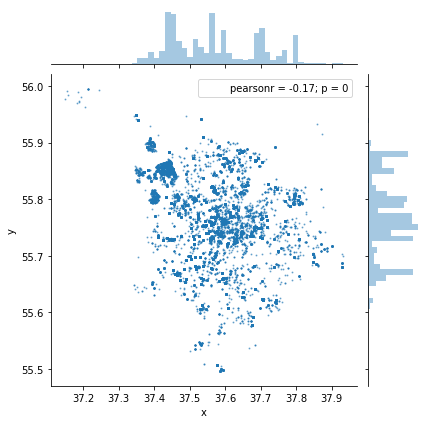

In [3]:
sns.jointplot(data.x, data.y, alpha=alpha, s=1);

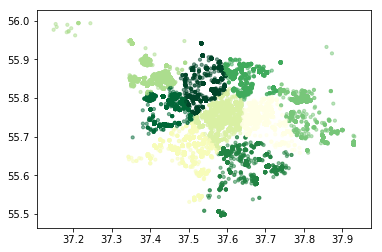

In [4]:
#визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
pred = KMeans(n_clusters=9, n_jobs=-1, random_state=random_state).fit_predict(data[['x', 'y']])
plt.scatter(data.x, data.y, c=pred, cmap=cmap, alpha=alpha, s=10);

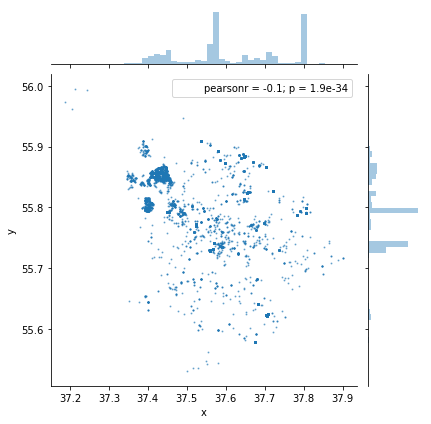

In [5]:
#аналогично исследовать скопления голосов за и против отдельно
pos=data[data.comment_class>0][['x', 'y']]
neg=data[data.comment_class<0][['x', 'y']]

sns.jointplot(pos.x, pos.y, alpha=alpha, s=1);

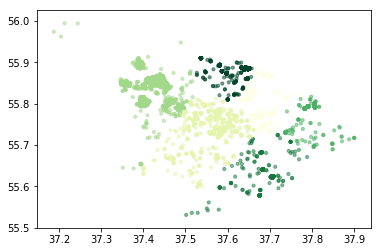

In [6]:
#Взглянем на распределение положительных голосов: можно выделить не менее 4х ярко выраженных кластеров на северо-западе. 
#Остальные голоса распределены более-менее равномерно.
pred = KMeans(n_clusters=6, n_jobs=-1, random_state=random_state).fit_predict(pos[['x', 'y']])
plt.scatter(pos.x, pos.y, c=pred, cmap=cmap, alpha=alpha, s=10);

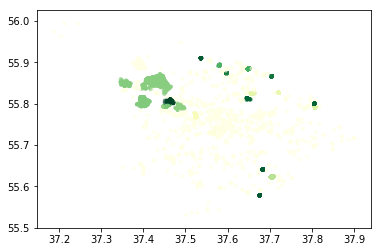

In [7]:
#KMeans сгруппировал явные кластера в один большой и разбил оставшееся еще на несколько частей. Попробуем DBSCAN
from collections import Counter

thesh=0.005
pred = DBSCAN(eps=1/200, n_jobs=-1).fit_predict(pos[['x', 'y']])
cnt=Counter(pred)
pred = [p if cnt[p]/len(pred)>thesh else -1 for p in pred]
plt.scatter(pos.x, pos.y, c=pred, cmap=cmap, alpha=alpha, s=10);

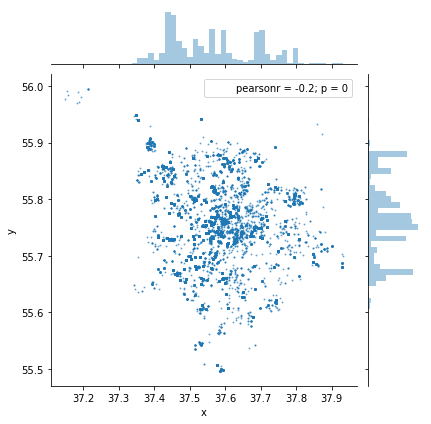

In [8]:
#Подгоняя eps для DBSCAN и порог отсечения, можно добиться четкого выделения скоплений голосов.
#Теперь посмотрим как распределялись голоса против.

sns.jointplot(neg.x, neg.y, alpha=alpha, s=1);

14174

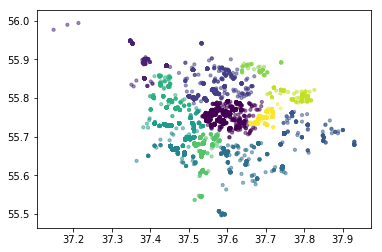

In [9]:
#Здесь голоcа распределены более равномерно, попробуем AgglomerativeClustering

from sklearn.cluster import AgglomerativeClustering

inds = np.array(range(neg.shape[0]))
np.random.shuffle(inds)
neg_cut = neg.loc[inds[:16000]]
neg_cut = neg_cut.dropna()
pred = AgglomerativeClustering(n_clusters=12, linkage='ward').fit_predict(neg_cut)
plt.scatter(neg_cut.x, neg_cut.y, c=pred, cmap='viridis', alpha=alpha, s=10);
neg_cut.shape[0]

In [10]:
#подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)

def auto_km_clusters(X, ks=range(2, 20)):
    fig, axes = plt.subplots(1, 2, figsize=(15, 2))
    
    inertia = []
    for n_clusters in ks:
        model = KMeans(n_clusters=n_clusters, n_jobs=-1, random_state=random_state)
        model.fit_predict(X)
        inertia.append(model.inertia_)
    axes[0].plot(ks, inertia)
    
    diff = np.diff(inertia)
    diff_r = diff[1:] / diff[:-1]
    axes[1].plot(ks[1:-1], diff_r)

    return ks[np.argmin(diff_r)+1]

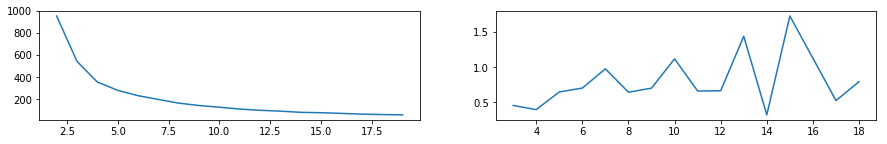

In [11]:
X = data[['x', 'y']]
km_opt = auto_km_clusters(X)

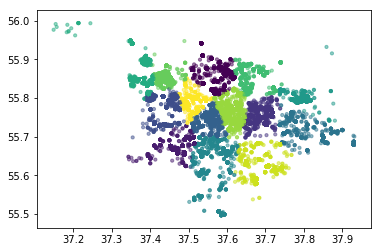

In [12]:
pred = KMeans(n_clusters=km_opt, random_state=random_state, n_jobs=-1).fit_predict(X)
plt.scatter(X.x, X.y, c=pred, cmap='viridis', alpha=alpha, s=10);